In [23]:
using Pkg
#Pkg.installed()
Pkg.add("StatsPlots")
Pkg.add("Missings")

    Updating registry at `C:\Users\liber\.julia\registries\General.toml`
   Resolving package versions...
   Installed TableOperations ─ v1.2.0
   Installed Qt5Base_jll ───── v5.15.3+1
   Installed DataValues ────── v0.4.13
   Installed StatsPlots ────── v0.14.33
    Updating `C:\Users\liber\.julia\environments\v1.7\Project.toml`
  [f3b207a7] + StatsPlots v0.14.33
    Updating `C:\Users\liber\.julia\environments\v1.7\Manifest.toml`
  [e7dc6d0d] + DataValues v0.4.13
  [f3b207a7] + StatsPlots v0.14.33
  [ab02a1b2] + TableOperations v1.2.0
  [ea2cea3b] ↑ Qt5Base_jll v5.15.3+0 ⇒ v5.15.3+1
Precompiling project...
  ✓ DataValues
  ✓ TableOperations
  ✓ Qt5Base_jll
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  ✓ StatsPlots
  7 dependencies successfully precompiled in 34 seconds (231 already precompiled, 2 skipped during auto due to previous errors)
  4 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions
   Resolving package versions...
    Updating `

In [1]:
using CSV
using DataFrames
using StatsPlots
using Plots 
gr()
using Statistics

In [2]:
lap_times_raw = DataFrame(CSV.File("C:/Users/liber/Documents/GitHub/Portifolio/F1_dataset/lap_times.csv"));

In [3]:
races = DataFrame(CSV.File("C:/Users/liber/Documents/GitHub/Portifolio/F1_dataset/races.csv"));
qualis = DataFrame(CSV.File("C:/Users/liber/Documents/GitHub/Portifolio/F1_dataset/qualifying.csv"))
dropmissing!(qualis)

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2
,Int64,Int64,Int64,Int64,Int64,Int64,String,String
1,1,18,1,1,22,1,1:26.572,1:25.187
2,2,18,9,2,4,2,1:26.103,1:25.315
3,3,18,5,1,23,3,1:25.664,1:25.452
4,4,18,13,6,2,4,1:25.994,1:25.691
5,5,18,2,2,3,5,1:25.960,1:25.518
6,6,18,15,7,11,6,1:26.427,1:26.101
7,7,18,3,3,7,7,1:26.295,1:26.059
8,8,18,14,9,9,8,1:26.381,1:26.063
9,9,18,10,7,12,9,1:26.919,1:26.164


In [4]:
races_period = races[2018 .<= races.year .<= 2021, :]
races_period = select(races_period, Not(:time));
dados = innerjoin(lap_times_raw, races_period, on = :raceId)

,raceId,driverId,lap,position,time,milliseconds,year,round,circuitId
,Int64,Int64,Int64,Int64,String,Int64,Int64,Int64,Int64
1,989,843,57,15,1:28.176,88176,2018,1,1
2,989,843,56,15,1:28.493,88493,2018,1,1
3,989,843,55,15,1:28.326,88326,2018,1,1
4,989,843,54,15,1:28.255,88255,2018,1,1
5,989,843,53,15,1:28.298,88298,2018,1,1
6,989,843,52,15,1:28.681,88681,2018,1,1
7,989,843,51,15,1:29.193,89193,2018,1,1
8,989,843,50,15,1:32.205,92205,2018,1,1
9,989,843,49,15,1:30.014,90014,2018,1,1


In [5]:
qualis = qualis[(qualis.position .== 1), :]
qualis = qualis[:, [:raceId, :q3]]

,raceId,q3
,Int64,String
1,18,1:26.714
2,19,1:35.748
3,20,1:33.096
4,21,1:21.813
5,22,1:27.617
6,23,1:15.787
7,24,1:17.886
8,25,1:16.449
9,26,1:21.049


In [6]:
pit_stops = DataFrame(CSV.File("C:/Users/liber/Documents/GitHub/Portifolio/F1_dataset/pit_stops.csv"))

,raceId,driverId,stop,lap,time,duration,milliseconds
,Int64,Int64,Int64,Int64,Time,String,Int64
1,841,153,1,1,17:05:23,26.898,26898
2,841,30,1,1,17:05:52,25.021,25021
3,841,17,1,11,17:20:48,23.426,23426
4,841,4,1,12,17:22:34,23.251,23251
5,841,13,1,13,17:24:10,23.842,23842
6,841,22,1,13,17:24:29,23.643,23643
7,841,20,1,14,17:25:17,22.603,22603
8,841,814,1,14,17:26:03,24.863,24863
9,841,816,1,14,17:26:50,25.259,25259


In [7]:
v = "1:15.666"
v[(end-2):end]
function converter(string)
    try
        numero = split(string, ":")
        min = parse(Float64, numero[1])
        sec = parse(Float64, numero[2])
        total = sec*1000 + min*60*1000
        return total
    catch
        return 0
    end
end

converter (generic function with 1 method)

In [8]:
qualis.PACE = zeros(436)

436-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [8]:
converter(v)

75666.0

In [9]:
dropmissing!(qualis)
map!(converter, qualis.PACE, qualis[:, :q3])

436-element Vector{Float64}:
  86714.0
  95748.0
  93096.0
  81813.0
  87617.0
  75787.0
  77886.0
  76449.0
  81049.0
  75666.0
      ⋮
  77868.0
  87999.0
  88796.0
  78750.0
  71376.0
 101359.0
  81299.0
 100983.0
  64984.0

In [10]:
qualis = qualis[qualis.PACE .> 0, :]

,raceId,q3,PACE
,Int64,String,Float64
1,18,1:26.714,86714.0
2,19,1:35.748,95748.0
3,20,1:33.096,93096.0
4,21,1:21.813,81813.0
5,22,1:27.617,87617.0
6,23,1:15.787,75787.0
7,24,1:17.886,77886.0
8,25,1:16.449,76449.0
9,26,1:21.049,81049.0


In [11]:
dados = innerjoin(dados, qualis, on = :raceId)

,raceId,driverId,lap,position,time,milliseconds,year,round,circuitId
,Int64,Int64,Int64,Int64,String,Int64,Int64,Int64,Int64
1,989,843,57,15,1:28.176,88176,2018,1,1
2,989,843,56,15,1:28.493,88493,2018,1,1
3,989,843,55,15,1:28.326,88326,2018,1,1
4,989,843,54,15,1:28.255,88255,2018,1,1
5,989,843,53,15,1:28.298,88298,2018,1,1
6,989,843,52,15,1:28.681,88681,2018,1,1
7,989,843,51,15,1:29.193,89193,2018,1,1
8,989,843,50,15,1:32.205,92205,2018,1,1
9,989,843,49,15,1:30.014,90014,2018,1,1


In [12]:
dados_sem_pit = antijoin(dados, pit_stops, on = [:raceId, :lap])

,raceId,driverId,lap,position,time,milliseconds,year,round,circuitId
,Int64,Int64,Int64,Int64,String,Int64,Int64,Int64,Int64
1,989,843,57,15,1:28.176,88176,2018,1,1
2,989,843,56,15,1:28.493,88493,2018,1,1
3,989,843,55,15,1:28.326,88326,2018,1,1
4,989,843,54,15,1:28.255,88255,2018,1,1
5,989,843,53,15,1:28.298,88298,2018,1,1
6,989,843,52,15,1:28.681,88681,2018,1,1
7,989,843,51,15,1:29.193,89193,2018,1,1
8,989,843,50,15,1:32.205,92205,2018,1,1
9,989,843,49,15,1:30.014,90014,2018,1,1


In [13]:
dados_sem_pit.volta_ajustada = dados_sem_pit.milliseconds./dados_sem_pit.PACE

61862-element Vector{Float64}:
 1.0863929821102951
 1.0902986545759203
 1.0882410921098025
 1.087366320043369
 1.087896111576561
 1.0926149524419693
 1.0989231679069538
 1.1360332166970577
 1.1090384899709231
 1.154083091025578
 ⋮
 1.1150300210695538
 1.1057618531464273
 1.107759198139059
 1.1171613343238866
 1.1211073085776224
 1.1061028632671206
 1.1153101365258375
 1.130131897843111
 2.0248937388106056

In [14]:
CSV.write("C:/Users/liber/Desktop/Stats/3o Semestre/ENP/dados_sem_pit", dados_sem_pit)

"C:/Users/liber/Desktop/Stats/3o Semestre/ENP/dados_sem_pit"

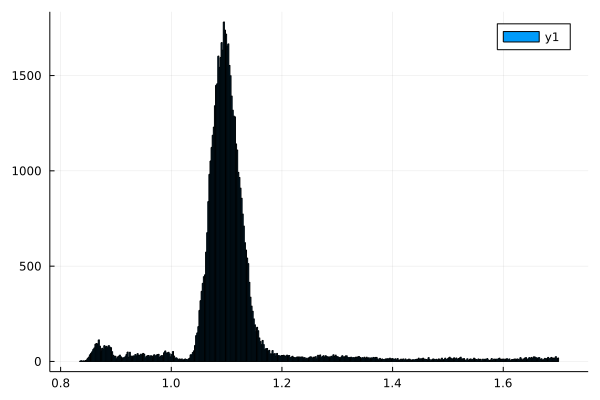

In [28]:
#dados_sem_pit = dados_sem_pit[dados_sem_pit.volta_ajustada .< 1.70, :]
histogram(dados_sem_pit.volta_ajustada)

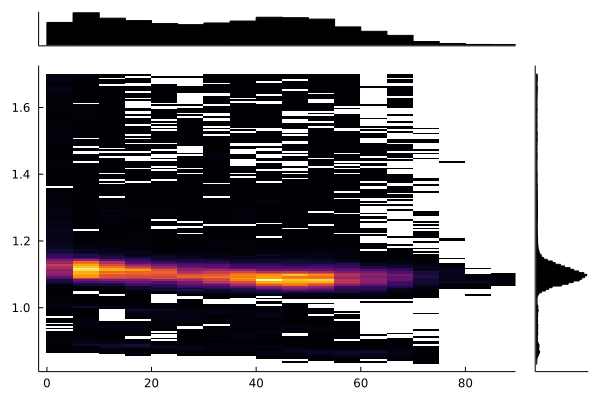

In [29]:
marginalhist(dados_sem_pit.lap, dados_sem_pit.volta_ajustada)

In [25]:
quantile(dados_sem_pit.volta_ajustada, [0.05, 0.1, 0.5, 0.9, 0.95, 0.975, 0.99])

7-element Vector{Float64}:
 0.9918555677528912
 1.0604859361735979
 1.0987961349596072
 1.1574404184209082
 1.3554534903048723
 1.6140765859070572
 1.7368216984565144

In [26]:
quantile(dados.volta_ajustada, [0.05, 0.1, 0.5, 0.9, 0.95, 0.975, 0.99])

7-element Vector{Float64}:
 1.0043963801437352
 1.0626566899224812
 1.100746841282057
 1.205287846213145
 1.4129260983962457
 1.6114178504484868
 1.7344867196437814

In [ ]:
scatter(dados.lap, dados.volta_ajustada, alpha = 0.25)

In [31]:
voltas_HAM = dados[dados.driverId .== 1, :]
CSV.write("C:/Users/liber/Desktop/Stats/3o Semestre/Pacotes/voltas_HAM", voltas_HAM)

"C:/Users/liber/Desktop/Stats/3o Semestre/Pacotes/voltas_HAM"

In [18]:
Drivers = DataFrame(CSV.File("C:/Users/liber/Documents/GitHub/Portifolio/F1_dataset/drivers.csv"))

,driverId,driverRef,number,code,forename,surname,dob
,Int64,String,String,String,String,String,Date
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07
2,2,heidfeld,\\N,HEI,Nick,Heidfeld,1977-05-10
3,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27
4,4,alonso,14,ALO,Fernando,Alonso,1981-07-29
5,5,kovalainen,\\N,KOV,Heikki,Kovalainen,1981-10-19
6,6,nakajima,\\N,NAK,Kazuki,Nakajima,1985-01-11
7,7,bourdais,\\N,BOU,Sébastien,Bourdais,1979-02-28
8,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17
9,9,kubica,88,KUB,Robert,Kubica,1984-12-07


In [19]:
Drivers[Drivers.forename .== "Max", :]

,driverId,driverRef,number,code,forename,surname,dob,nationality
,Int64,String,String,String,String,String,Date,String
1,349,jean,\\N,\\N,Max,Jean,1943-07-27,French
2,720,terra,\\N,\\N,Max,de Terra,1918-10-06,Swiss
3,820,chilton,4,CHI,Max,Chilton,1991-04-21,British
4,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch


In [30]:
voltas_VER = dados[dados.driverId .== 830, :]
CSV.write("C:/Users/liber/Desktop/Stats/3o Semestre/Pacotes/MAX.csv", voltas_VER)


"C:/Users/liber/Desktop/Stats/3o Semestre/Pacotes/MAX.csv"

In [26]:
#histogram(voltas_VER)
quantile(voltas_VER, [0.05, 0.9, 0.95, 0.975, 0.99])

5-element Vector{Float64}:
  68881.5
 104488.0
 115250.0
 135036.75
 171561.50000000044

In [27]:
quantile(voltas_HAM, [0.05, 0.9, 0.95, 0.975, 0.99])

5-element Vector{Float64}:
  69415.2
 104949.40000000001
 116783.79999999997
 142771.69999999998
 176811.55999999974

In [25]:
using Statistics
#quantile(dados[dados.driverId .== 3, :].milliseconds, [0.05, 0.9, 0.95, 0.975, 0.99])

In [ ]:
dados_ham = dados[dados.milliseconds .< 100000, :]
dados_ham = dados_ham[dados_ham.driverId .== 1, :]

In [ ]:
scatter(dados[dados.circuitId .== 1, :].lap, dados[dados.circuitId .== 1, :].milliseconds)

In [ ]:
quantile(dados.milliseconds, [0.05, 0.9, 0.95, 0.975, 0.99])

In [ ]:
hamilton = filter(row -> row.driverId == 1 , lap_times_raw);

In [ ]:
hamilton_race_1 = filter(row -> row.raceId == 841, hamilton);

In [21]:
using Plots 
gr()

Plots.GRBackend()

In [ ]:
histogram(hamilton_race_1.milliseconds, bins = 100);

In [ ]:
hamilton_race_2 = filter(row -> row.raceId == 1015, hamilton);

In [ ]:
#scatter(lap_times_raw.milliseconds, lap_times_raw.lap)

In [ ]:
race1015 = filter(row -> row.raceId == 1015 , lap_times_raw);

In [ ]:
using Statistics

In [ ]:
function mean_groups(grouped_data)    
    mean_times = Dict()
    for (j, i) in enumerate(keys(grouped_data))
        mean_ = mean(get(gd, i, nothing).milliseconds)
        driver = get(gd, i, nothing).driverId[1]
        mean_times[driver] = mean_  
    end
    return mean_times
end

In [ ]:
means = mean_groups(gd)

In [ ]:
delete!(means, 844)

In [ ]:
histogram(means, bin = 9)

In [ ]:
drivers_raw = DataFrame(CSV.File("C:/Users/liber/Documents/GitHub/Portifolio/F1_dataset/drivers.csv"));

In [ ]:
function drivers_dict(data)
    drivers = Dict()
    for i in 1:nrow(drivers_raw)
        ID = drivers_raw.driverId[i]
        driver = drivers_raw.surname[i]
        drivers[ID] = driver
    end
    return drivers
end

In [ ]:
nrow(drivers_raw)

In [ ]:
drivers = drivers_dict(drivers_raw)

In [ ]:
drivers[1]

In [ ]:
names(lap_times_raw)

In [ ]:
races = DataFrame(CSV.File("C:/Users/liber/Documents/GitHub/Portifolio/F1_dataset/races.csv"));

In [ ]:
first(races, 6)

In [ ]:
function races_dict(data)
    races_dictionary = Dict()
    for i in 1:nrow(data)
        ID = data.raceId[i]
        year = data.year[i]
        circuit = data.name[i]
        races_dictionary[ID] = (year, circuit)
    end
    return races_dictionary
end

In [ ]:
race_dict = races_dict(races)

In [ ]:
D = Dict('a'=>5, 'b'=>6)

In [ ]:
depois_de_2013 = [i for (i, j) in race_dict if j[1]>2013]
# filter(x -> x[1]> 2013, race_dict)